# Medical Problems : Classifying Heart Diseases 

The Steps to train and test the dataset for heart disease is shown below:
1. Export The Datasets,Libraries , and split it into train and test datasets
2. Anaylze it (EDA)
3. Data Preprocessing
4. Build The Model
5. Train And Test
6. Evaluation To Improve And Predictions

# What Are We gonna do for each column
1. ID: Unique identification number for each customer (categorical, acts as a key, not used for prediction).
2. Gender: Gender of the customer (Categorical -> Binary, 1 = Male, 0 = Female).
3. Ever_Married: Marital status of the customer (Categorical -> Binary, 1 = Yes, 0 = No).
4. Age: Age of the customer (Numeric, in years).
5. Graduated: Whether the customer has completed university education or not (Categorical -> Binary, 1 = Yes, 0 = No).
6. Profession: Occupation of the customer (Categorical).
7. Work_Experience: Years of work experience (Numeric,years).
8. Spending_Score: Customer's spending habits (Categorical -> Ordinal, Low = 0, Average = 1, High = 2).
9. Family_Size: Total number of family members (Numeric).
10. Var_1: categorical attribute (Categorical).
11. Y / Segmentation: Customer segmentation category (Categorical -> Target, A/B/C/D, based on customer traits).

# STEP 1 IMPORT THE LIBRARIES THAT NEEDED FOR THE CODE

In [5]:
#Data manipulation libraries
import numpy as np
import pandas as pd

# Correlation test
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as mp
import seaborn as sea

# visualization libraries
import plotly
import plotly.express as px
import plotly.graph_objects as gro
from plotly.subplots import make_subplots
import random #this will be used to generate color

#sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

#Machine learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Input
import tensorflow as tf

2024-11-04 19:22:07.192729: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tau ga kenapa kalau mau program machine learning butuh beli Apple ? ( bonus 6 )
karena mac-hine learning

In [8]:
health_dataset = pd.read_csv("/Users/aaron/Documents/heart-disease.csv")
health_dataset.head(5)
# pertama kita liat setiap unique values yang ada di dataset kita
for column in health_dataset.columns:
    unique_values = health_dataset[column].nunique()
    print(f"{column}: {unique_values}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


# Split the Train and Test Data

In [7]:
health_trainset,health_testset = train_test_split(health_dataset,test_size=0.30,random_state=50)
health_trainset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1


In [2]:
health_testset.head()

NameError: name 'health_testset' is not defined

# STEP 2 PERFORM EDA ( Exploratory Data Analysis )
# 1. Duplicate Data
Langkah Pertama di EDA kita cek apakah data kita ada yang kembar atau tidak karena kalau ada sangat tidak menguntungkan buat kita karena akan memberi informasi yang sama

In [9]:
health_trainset.duplicated().sum()
duplicates = health_trainset[health_trainset.duplicated()]
print(duplicates)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


ini lah yang namanya data yang ga berpendirian sendiri dia ngikut ngikut data lain jadi langsung aja kita musnahkan

In [6]:
health_trainset = health_trainset.drop_duplicates()
health_trainset.duplicated().sum()

0

Oke Udah Aman kita lanjut ke 
# 2. missing Values

In [7]:
health_trainset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Karena kita cek ga ada missing values ya udah kita langsung next aja ke step berikutnya
# 3. Splitting The Datasets to Numeric And Categorical

In [8]:
print(health_dataset.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Jadi Disini kita split aja data binary yang didapat dari categorical dengan yang numeric

In [9]:
# buat tempat untuk menyimpan isi columnya 
numerical_columns = []
ordinal_columns = []
for column in health_trainset.columns:
    # pertama kita liat setiap unique values yang ada di dataset kita
    unique_values = health_trainset[column].nunique()
    # kalau dia lebih dr 2 maka dia masuk ke numerical column
    if unique_values > 10:
        numerical_columns.append(health_trainset[column]) 
    # tapi kalau cuman 2 artinya dia ordinal yang didpt dr kategorical
    elif unique_values < 10:
        ordinal_columns.append(health_trainset[column])

# ubah isi column itu menjadi datasets
# disini kan bentuknya list waktu kita ambil
# jadi harus tambah .T untuk transpose biar sesuai dengan posisinya
numerical_datasets_sementara = pd.DataFrame(numerical_columns).T  
ordinal_datasets_sementara = pd.DataFrame(ordinal_columns).T


Karena Dataset kita udah numeric semua jadi ga usah displit langsung lanjut aja ke plotting
# 4. Plotting

In [10]:
numerical_datasets_sementara

,age,trestbps,chol,thalach,oldpeak
121,59.0,138.0,271.0,182.0,0.0
145,70.0,156.0,245.0,143.0,0.0
144,76.0,140.0,197.0,116.0,1.1
244,56.0,132.0,184.0,105.0,2.1
160,56.0,120.0,240.0,169.0,0.0
...,...,...,...,...,...
70,54.0,120.0,258.0,147.0,0.4
132,42.0,120.0,295.0,162.0,0.0
289,55.0,128.0,205.0,130.0,2.0
109,50.0,110.0,254.0,159.0,0.0


In [11]:
# untuk menghasilkan warna random untuk tiap grafik dan juga untuk tiap unique value yang berbeda kalau ordinal
def generate_random_colors(num_colors):
    return [f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 1)' for _ in range(num_colors)]

def plot_numerical(data):
    for column in data.columns:
        # membuat subplot agar bisa 2 plot bersampingan di sini 1 row dan 2 kolom
        graphic = make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {column}", f"Boxplot of {column}"))

        # Menambahkan Visualisasi Histogram
        graphic.add_trace(
            gro.Histogram(x=data[column], marker=dict(color=generate_random_colors(1)[0])),
            row=1, col=1
        )
        # Menambahkan Visualisasi Boxplot
        graphic.add_trace(
            gro.Box(y=data[column], marker=dict(color=generate_random_colors(1)[0])),
            row=1, col=2
        )

       # ngebuat title untuk satu keseluruhan boxplot dan histogram
        graphic.update_layout(title=f"Distribution Visualization and Outliers Checking of {column}", showlegend=False)
        graphic.show()

# ini hanya untuk plot yang numerical
plot_numerical(numerical_datasets_sementara)

In [12]:
# ini untuk warna ya biar cantik :)
def generate_random_colors(num_colors):
    return [f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 1)' for _ in range(num_colors)]

# function ordrinal beda ama numerical
def plot_ordinal(data):
    # looping per kolom
    for column in data.columns:
        # Menghitung frekuensi dari setiap nilai unik di kolom ordinal
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = ['value', 'count']
        
        # Generate warna acak untuk setiap bar (terlepas dari unique value)
        random_colors = generate_random_colors(len(value_counts))
        
        # Membuat Bar Chart dengan warna berbeda untuk setiap bar
        graphic = px.bar(value_counts, 
                     x='value', 
                     y='count',
                     title=f'Bar Chart of {column}', 
                     labels={'value': column, 'count': 'Count'})
        
       # ngeapply warna ke barnya
        graphic.update_traces(marker_color=random_colors)
        
        # Menampilkan grafik
        graphic.show()


plot_ordinal(ordinal_datasets_sementara)

Dari grafik di atas kita mendapat beberapa info :
1. Untuk Age sendiri memiliki distribusi yang cukup aman / normal , ga skew skew amat dan no outliers
2. Selanjutnya CP atau chest pain dari tingkat nyeri dada, terlihat distribusi yang skew left dan no outliers. Nah untuk masalah skewnya ini dikarenakan data yang inbalance jadi kita akan ubah ke biner
3. trestbps (resting blood pressure), tekanan darah waktu istirahat memiliki distribusi yang ga skew skew amat sih tapi dia memiliki beberapa outliers dimana ini akan kita tetepin aja karena ga banyak dan angkanya juga ga ekstrim.
4. Chol (kolesterol) sama dengan trestbps, kolesterol juga akan kita tetapin karena nilai outliernya ga ekstrim dan ga banyak outliersnya.  
5. selanjutnya restcg atau Hasil Elektrokardiografi Istirahat nah untuk ini karena inbalance data untuk no 2 nya maka kita buat biner aja jadi 1 dan 0. jadi 1 (artinya ada kelainan pada aktivitas jantung) dan 0 ( tidak ada kelainan )
6. Thalach ( detak Jantung Maksimum ) disini distribusinya ga terlalu skew walaupun ada 1 - 3 data yang berada di pojok kiri dan kanan ditambah ada 1 outliers. Disini juga kita ga akan tetapin karena detak jantung ini wajar berdasarkan angkanya jadi ga akan kita capping.
7. Old peak (penurunan segmen ST) untuk Oldpeak ini merupakan penurunan dari sesi olahraga dan istirahat. Sama dengan kolesterol dan tekanan darah waktu istirahat ini akan kita tetapin.
8. Untuk Slope Atau kemiringan segmen ST waktu istirahat memiliki distribusi yang bagus walaupun terdapat inbalance di data 0 tapi kita ga bisa ubah karena kalau kita ubah biner jadi 1 0 yang ada tambah inbalance di tambah ini ga ada outliers jadi aman. Lanjutt
9. Untuk Ca juga akan kita ubah ke biner karena data yang cukup inbalance menjadi 1(pembuluh darah tersumbat) dan 0(tidak ada pembuluh darah tersumbat)
9. Terakhir Thalasemia, sekali lagi ini sama kayak slope terdapat data inbalance di 0 namun kita ga bisa ubah biner jadi kita biarin aja apa adanya datanya.
10. untuk sex dan fbs kita bisa liat mereka memiliki data yang inbalance bgt tapi ga ada yang bisa kita lakuin karena jika kita ubah informasi yang didapatkan jadi ga murni.
11. untuk exang distribusinya tidak sepenuhnya normal tapi masih better dari sex dan fbs
12. Target atau output yang akan didapatkan memiliki distribusi yang bagus antara iya dan tidak hampir seimbang


# Mengubah Restecg dan CA serta CP menjadi Biner 

In [13]:
ordinal_datasets_sementara['ca'] = ordinal_datasets_sementara['ca'].apply(lambda x: 1 if x >= 1 else 0)
ordinal_datasets_sementara['restecg'] = ordinal_datasets_sementara['restecg'].apply(lambda x: 1 if x >= 1 else 0)
ordinal_datasets_sementara['cp'] = ordinal_datasets_sementara['cp'].apply(lambda x: 1 if x >= 1 else 0)
ordinal_datasets_sementara

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
121,1,0,0,0,0,2,0,2,1
145,1,1,0,0,0,2,0,2,1
144,0,1,0,1,0,1,0,2,1
244,1,0,0,0,1,1,1,1,0
160,1,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...
70,1,1,0,0,0,1,0,3,1
132,1,1,0,1,0,2,0,2,1
289,0,0,0,1,1,1,1,3,0
109,0,0,0,0,0,2,0,2,1


 Sekarang kita pindahin ke ordinal datasets

# HISTOGRAM AND BOXPLOT FOR NUMERIC

In [14]:
plot_numerical(numerical_datasets_sementara)

# BAR CHART FOR ORDINAL

In [15]:
plot_ordinal(ordinal_datasets_sementara)

# After Visualization waktunya menjodohkan
# SPEARMAN CORRELATION TEST FOR NUMERICAL

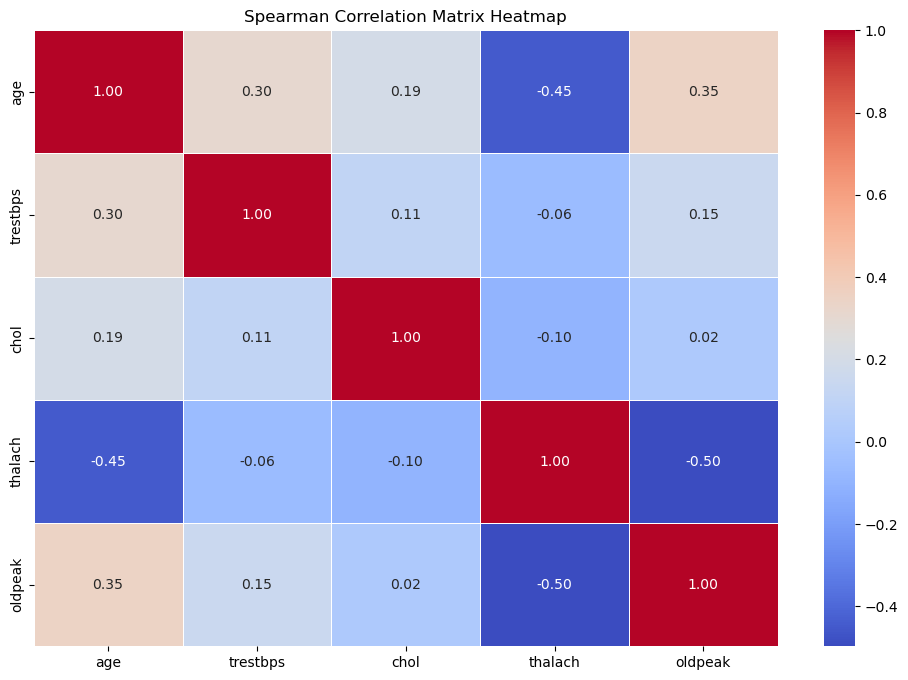

In [16]:
spearman_corr = numerical_datasets_sementara.corr(method='spearman')

# Visualisasi matriks korelasi dengan heatmap
# biar enaknya ngeliat
# ukuran mapnya
mp.figure(figsize=(12, 8))
# memvisualisasikan spearman ke mapnya dengan seaborn
sea.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mp.title('Spearman Correlation Matrix Heatmap')
mp.show()

nah sekarang yang di atas 0.5 akan kita lihat dari VIF apakah mereka colinearity karena kalau mereka kolinear kayak 2 variabel yang sama tapi dapat 1 info yg Penting ( buang buang Waktu juga) 
# YANG BENER AJA RUGI DONG

# VIF TEST

In [17]:
multicolinearity_table = pd.DataFrame()

multicolinearity_table["Variable Name"] = numerical_datasets_sementara.columns

multicolinearity_table["Colinearity %"] = [variance_inflation_factor(numerical_datasets_sementara.values,i)
    for i in range(len(numerical_datasets_sementara.columns))]

multicolinearity_table


,Variable Name,Colinearity %
0,age,38.656797
1,trestbps,63.447583
2,chol,25.301144
3,thalach,30.076891
4,oldpeak,2.130854


untuk sementara kita keep dulu jawaban kita ini karena kita belum tau apakah nilai vif sebesar ini akan mempengaruhi model kita nantinya jadi kita save dulu

Setelah udah ga ada debu kita lanjut preprocess

# STEP 3 PREPROCESS THE DATA

 pada step ke 3 kita akan memprosess data yang sudah bersih, karena semua data sudah dalam numeric kita akan melakukan enconding dan min max scaler

pertama adalah enconding karena data kita semuanya sudah numeric kita ga butuh enconding lagi jadi langsung lanjut aja ke min max scaler

Disini ada beberapa data yang harus kita min max scaler terutama yang numeric semuanya jadi untuk scalernya yang kita pakai adalah MIN MAX scaler, mengapa ? karena kalau STD dia kan sensitve banget ama outlier karena dia scaling nya pake std dan mean,sedangkan robust tuh bagus kalau banyak outlier sedangkan kita ga terlalu banyak outliernya jadi MIN MAX aja. jadi kalau udah nantinya kita akan langsung gabungin datanya ama yg ordinal

Disini kita untuk train kita fit dulu dan testnya kita transform jangan difit kalau ga nanti nyontek dan jadi mempengaruhi hasil evaluasi

In [1]:
# List kolom yang ingin di-scale ( kenapa harus dilist gini karena nanti kalau ga keurut )
columns_to_scale = ['age', 'thalach', 'chol', 'oldpeak','trestbps']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Buat salinan DataFrame agar kolom selain yang di-scale tidak berubah
numerical_datasets_sementara = numerical_datasets_sementara.copy()

numerical_datasets_sementara[columns_to_scale] = scaler.fit_transform(numerical_datasets_sementara[columns_to_scale])

# Create a copy of the test DataFrame
health_testset = health_testset.copy()

# Transform the test data using the already fitted scaler
health_testset[columns_to_scale] = scaler.transform(health_testset[columns_to_scale])


NameError: name 'MinMaxScaler' is not defined

 Sebelum lanjut ke step berikutnya kita akan gabungin lagi datanya

In [19]:
cleaned_datasets = pd.concat([numerical_datasets_sementara,ordinal_datasets_sementara],axis=1)
cleaned_datasets

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
121,0.638298,0.448980,0.498282,0.847328,0.000000,1,0,0,0,0,2,0,2,1
145,0.872340,0.632653,0.408935,0.549618,0.000000,1,1,0,0,0,2,0,2,1
144,1.000000,0.469388,0.243986,0.343511,0.177419,0,1,0,1,0,1,0,2,1
244,0.574468,0.387755,0.199313,0.259542,0.338710,1,0,0,0,1,1,1,1,0
160,0.574468,0.265306,0.391753,0.748092,0.000000,1,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.531915,0.265306,0.453608,0.580153,0.064516,1,1,0,0,0,1,0,3,1
132,0.276596,0.265306,0.580756,0.694656,0.000000,1,1,0,1,0,2,0,2,1
289,0.553191,0.346939,0.271478,0.450382,0.322581,0,0,0,1,1,1,1,3,0
109,0.446809,0.163265,0.439863,0.671756,0.000000,0,0,0,0,0,2,0,2,1


kita pisahkan data x dan data y di train maupun test biar dia ga nyontek

In [20]:
Train_y = pd.DataFrame(cleaned_datasets['target'])
Train_X = cleaned_datasets.drop(columns=['target'])

Train_X

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
121,0.638298,0.448980,0.498282,0.847328,0.000000,1,0,0,0,0,2,0,2
145,0.872340,0.632653,0.408935,0.549618,0.000000,1,1,0,0,0,2,0,2
144,1.000000,0.469388,0.243986,0.343511,0.177419,0,1,0,1,0,1,0,2
244,0.574468,0.387755,0.199313,0.259542,0.338710,1,0,0,0,1,1,1,1
160,0.574468,0.265306,0.391753,0.748092,0.000000,1,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.531915,0.265306,0.453608,0.580153,0.064516,1,1,0,0,0,1,0,3
132,0.276596,0.265306,0.580756,0.694656,0.000000,1,1,0,1,0,2,0,2
289,0.553191,0.346939,0.271478,0.450382,0.322581,0,0,0,1,1,1,1,3
109,0.446809,0.163265,0.439863,0.671756,0.000000,0,0,0,0,0,2,0,2


In [21]:
Test_Y = pd.DataFrame(health_testset['target'])
Test_X = health_testset.drop(columns=['target'])
Test_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
112,0.744681,0,2,0.469388,0.642612,0,1,0.473282,0,0.032258,2,0,3
63,0.255319,1,1,0.418367,0.264605,0,1,0.465649,0,0.000000,1,0,1
270,0.361702,1,0,0.265306,0.422680,0,0,0.557252,0,0.129032,2,0,3
39,0.765957,0,2,0.673469,0.804124,0,0,0.610687,0,0.129032,2,0,2
277,0.595745,1,1,0.306122,0.463918,0,1,0.534351,0,0.048387,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.765957,0,2,0.622449,0.491409,0,1,0.587786,0,0.129032,2,0,2
202,0.617021,1,0,0.571429,0.494845,0,0,0.305344,1,0.129032,2,0,3
23,0.680851,1,2,0.571429,0.402062,1,1,0.503817,1,0.161290,1,0,2
151,0.893617,0,0,0.183673,0.079038,0,1,0.412214,0,0.258065,1,0,2


# Building The models

Menginitialized Sequential ini tuh kayak nge add layer di neural network nantinya

In [22]:
model = Sequential()

setelah membuat layer di NN selanjutnya kita akan memasukkan units dimana ini 16 Neuron dan Activationnya relu artinya functiin yang kita pakai untuk input layer adalah relu dan input shape adalah kolom test maupun train x kita yaitu 13. Disini kenapa aku milih relu sebagai activationnya karena relu ini tuh non linier function jadi model nantinya akan lebih mudah untuk melihat pattern pattern yang ada dalam data nantinya. selain itu relu juga simple banget jadi kita coba dulu yang simple.

In [23]:
model.add(Input(shape=(13,)))
model.add(Dense(units=16, activation='relu'))

selanjutnya kita akan menambahkan output layernya yaitu sih y dimana cuman butuh 1 neuron dan untuk activationnya sigmoid dimana sigmoid ini aku pilih karena biasanya digunakan untuk binary classification ditambah data kita kan outputnya binary classification.

In [24]:
model.add(Dense(1, activation='sigmoid'))

disini kenapa aku milih optimizernya adam karena dia ini adaptif jadi akan mudah beradaptasi dengan data kita nantinya apalagi data kita nih rangenya tuh lumayan luas dan nantinya akan loncat loncat contohnya seperti di tresbps , chol, dll. jadi optimizer adam akan gampang nantinya melihat data di model kita dan juga kemampuan adam untuk melihat noise dalam data sehingga nantinya kita akan dapat akurasi yang lebih efisien. Disini kenapa aku pake 0.001 karena menurutku:
1. pertama ini merupakan angka yang stabil nantinya untuk memprediksi outcome yang akan keluar 
2. learning rate 0.1 - 0.001 biasanya sering digunakan untuk adam optimizer 
3. last but not least kita tentang health dataset jadi agak cukup sensitive oleh karena itu kalau kita ksh 0.001 nantinya model ngeupdate ga akan terlalu signifikan karena model akan lebih mempresisi patern yang ada setiap epochnya.

In [25]:
adam = keras.optimizers.Adam(learning_rate=0.001)

binary crossentropy ini menghitung perbedaan antara predicted value (Y) dengan nilai y yang sesungguhnya, sedangkan untuk metrics = accuray ini untuk menghitung persentase berapa sering model kita benar

In [26]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

oke langsung aja kita fit train X dan Y

In [27]:
model.fit(Train_X, Train_y, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3654 - loss: 0.7678
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4376 - loss: 0.7567
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 0.7322
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 0.6917
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 0.6780
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.6507
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - loss: 0.6332
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7096 - loss: 0.6267
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7536 - loss: 0.6036
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.5948
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.5620
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.5663
E

kalau ada kita eval dengan test x maupun test y

In [28]:
loss_and_metrics = model.evaluate(Test_X, Test_Y)
print('Loss = ', loss_and_metrics[0])
print('Accuracy = ', loss_and_metrics[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 0.5876
Loss =  0.5752171277999878
Accuracy =  0.7582417726516724


# dari Run pertama model kita sudah mendapat akurasi 72%, persentase ini udah cukup bagus untuk model kita tapi coba kita tuning sedikit agar dapat persentase akurasi yang lebih besar. tadi kan di atas kita masih pakai trestbps sekarang coba kita buang

In [29]:
Train_X = Train_X.drop(columns='trestbps')
Test_X = Test_X.drop(columns='trestbps')

kalau udah kita run lagi dan JANGAN LUPA GANTI 13 ke 12 nanti kalau ga error :)

In [30]:
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.fit(Train_X, Train_y, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 0.6145
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.4550
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.3900
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3531
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3677
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: 0.3221
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3498
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.2980
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.3112
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.3683
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3127
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3008
E

In [31]:
loss_and_metrics = model.evaluate(Test_X, Test_Y)
print('Loss = ', loss_and_metrics[0])
print('Accuracy = ', loss_and_metrics[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7557 - loss: 1.0535
Loss =  0.9695655107498169
Accuracy =  0.7692307829856873


nah kita dapat lebih besar 78% oke kita lanjut ke prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


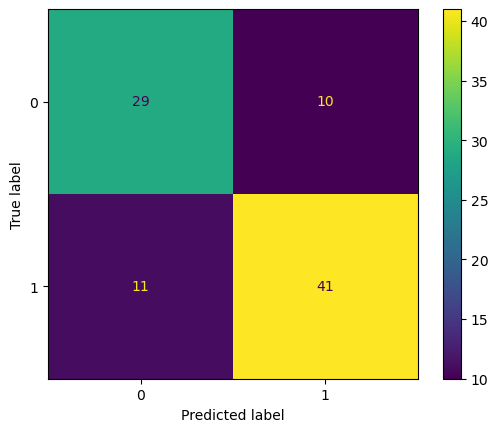

In [32]:
prediction = model.predict(Test_X)
predicted = tf.squeeze(prediction)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
answer = np.array(Test_Y)
confusion = confusion_matrix(answer, predicted)
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

In [33]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(Test_X)
y_pred = (y_pred_prob > 0.5).astype(int) 

report = classification_report(Test_Y, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

print(df_report[['precision', 'recall', 'f1-score']])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score
0              0.725000  0.743590  0.734177
1              0.803922  0.788462  0.796117
accuracy       0.769231  0.769231  0.769231
macro avg      0.764461  0.766026  0.765147
weighted avg   0.770098  0.769231  0.769571


Untuk Case ini kita lebih mementingkan recall yang lebih tinggi di bandingkan precision dikarenakan case penyakit sangat bahaya jika yang ga sakit diidentifikasi-in sakit. Jika kita melihat macro average dari recall disini mendapatkan hasil yang lebih besar sedikit dari precision walaupun sama sama berada di persentase 76. Disini dapat kita lihat dari segi presisi juga dimana 76,4% dr setiap waktu model akan benar dalam memprediksi label 1 maupun label 0 sebagai true label mereka sedangkan dengan recall 76,6% dimana model akan mendeteksi 76,6 % seberapa banyak label 1 yang terdeteksi in this case bisa benar maupun salah. Dengan begini artinya acda trade off yang terbentuk di model kita, model lebih mendeteksi yang berkemungkinan menjadi 1 lebih banyak namun tidak semua yang diprediksinya benar. Jadi dari model ini kita keep dikarenakan kita sangat mementingkan Recall yang lebih tinggi drpada precision.

In [34]:
import plotly.graph_objects
model_prediction = model.predict(Test_X)[:,0]

fpr,tpr,treshold = roc_curve(Test_Y,model_prediction)
roc_auc = auc(fpr,tpr)

model_ROC  = plotly.graph_objects.Figure()

model_ROC.add_trace(plotly.graph_objects.Scatter(
     x=fpr,
     y = tpr,
     mode = "lines",
     name=f"AUC={roc_auc:.2f}"
))

model_ROC.add_trace(plotly.graph_objects.Scatter(
    x=[0,1],
    y = [0,1],
    mode = "lines",
    line = dict(dash='dash'),
    name ="AUC=0.5(random guess)"
    ))   

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


True Positive Rate vs False Positive Rate: ROC curve menggambarkan hubungan antara berapa banyak kasus positif yang benar terdeteksi dengan false positive rate (berapa banyak kasus negatif yang salah diklasifikasikan sebagai positif). Dengan AUC = 0.81, ROC curve model kita lebih dekat ke pojok kiri atas grafik, yang menunjukkan kinerja yang bisa diblg cukup bagus. karena nilai AUC > 0.5 atau treshold artinya kita bisa conclude kalau model kita tidak hanya sekedar tebak-tebakan tetapi memiliki kinerja dan proses untuk menemukan pola-pola dari variabel yang ada untuk tepat memprediksi test data nya.

# One taboo in ML is fitting scalers and encoders to the whole dataset. Why? ( Bonus 5 )
kalau dari sepemahaman aku hal ini taboo karena :
1. untuk fitting scaler : kenapa ini taboo banget karena data akan memiliki akses langsung ke data testnya kalau kita fit sama aja kayak nyontek dimana nantinya waktu kita evaluasi dia akan mendapatkan persentase yang bagus padahal nyatanya ga sebagus itu ferguso. Selain itu juga memungkinkan overfit karena sih data udah nyontek dulu jadi menghasilkan persentase yang bagus di train tp jelek di test. makanya biasanya kita kalau di test itu kita transform doang.
2. untuk encoders : ini taboo juga sih mungkin karena kalau misalnya dia categorical sebenernya unique value tuh ada 4 tapi di train itu cuman ada 3 sedangkan ditest ada 4. Maka model nantinya akan bingung terhadap kategori yang baru itu. DItambah ga bisa juga kita enconding yang udh numerical ( yang ada kita malah mengubah num menjadi categorical nantiny)

# Explain what is the ROC curve and what does it tell us about a classification model's performance (Bonus 4 )!


berdasarkan mbak google, ROC Curve adalah representasi grafis yang digunakan untuk mengevaluasi kinerja model klasifikasi biner.
dimana curve ini ngeplotnya 
TPR(Y) : True Positive Rate : TP (True Positive) / TP + FN(False Negative) = 0.92% di data kita tadi 
FNR(X) : False Negative Rate : FP(False Positive) / FP + TN (True Negative) = 16/39 = 0.41 di data kita
nah nantinya dia tuh akan dibuat kayak kurva gitu dengan nantinya kita bisa menganalisa model kita dari curve nya:
- semakin kurva mendekati sumbu y artinya semakin bagus dia memprediksi data kita secara benar ( TPR )
- sedangkan x artinya si FNR 
jadi gunanya ROC ini untuk apa :
1. memberikan visualisasi yang baik tentang model ngecompare dia bisa bedain 0 sama 1 tuh semana bagusnya
2. dia juga bisa menetukan treshold yang optimal dari grafik yang kita bentuk
3. kalau kita buat banyak model terus buat ROC curve kita bisa dengan cepat langsung tau model mana yang lebih bagus
4. memprediksi seberapa akurat mesin akan memprediksi ga random.